# Simple Animations for ASTR 19 
Building some animations

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from tqdm import tqdm

In [7]:
#Create some data to plot
x = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(x), np.sin(x)

# Read in our defaults

In [8]:
plt.style.use('./astr19_matplotlib_defaults.txt')

# Make a plot

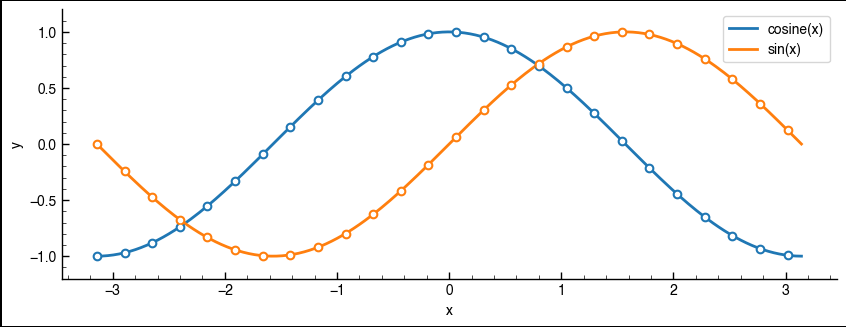

In [9]:
fig = plt.figure(linewidth=1, figsize=(10,5))
ax = plt.subplot(1,1,1, aspect=1)
ax.plot(x, C, zorder=9, color='#1f77b4', label='cosine(x)')
ax.plot(x, S, zorder=9, color='#ff7f0e', label='sin(x)')
ax.plot(x, C, 'o', markevery=10, clip_on=False, zorder=10, ms=6, color="#1f77b4")
ax.plot(x, S, 'o', markevery=10, clip_on=False, zorder=10, ms=6, color='#ff7f0e')
ax.plot(x, C, 'o', markevery=10, clip_on=False, zorder=11, ms=3, color='white')
ax.plot(x, S, 'o', markevery=10, clip_on=False, zorder=11, ms=3, color='white')
ax.set_xlabel('x') 
ax.set_ylabel('y')
ax.legend()
plt.savefig('astr19_defaults.png', bbox_inches='tight', facecolor='white')

# Trying to animate a curve and save as GIF

In [ ]:
fig = plt.figure(linewidth=1, figsize=(10,5))
ax = plt.subplot()

X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)
(line1, ) = ax.plot(X, C, zorder=9, color='#1f77b4', marker='o', markevery=[-1], markeredgecolor='white',
label='cosine(x)')
(line2, ) = ax.plot(X, S, zorder=9, color='#ff7f0e', marker='o', markevery=[-1], markeredgecolor='white',
label='sin(x)')

#add some nice points
(dots1, ) = ax.plot(X, C, 'o', markevery=10, clip_on=False, zorder=10, ms=6, color="#1f77b4")
(dots2, ) = ax.plot(X, S, 'o', markevery=10, clip_on=False, zorder=10, ms=6, color='#ff7f0e')
(wdots1, ) = ax.plot(X, C, 'o', markevery=10, clip_on=False, zorder=11, ms=3, color='white')
(wdots2, ) = ax.plot(X, S, 'o', markevery=10, clip_on=False, zorder=11, ms=3, color='white')

#draw the legend
ax.set_xlabel('x') 
ax.set_ylabel('y')
ax.legend(frameon=False,loc='upper left')

#function that updates the plot
#based on the frame number
def update(frame): 
    line1.set_data(X[:frame], C[:frame])
    line2.set_data(X[:frame], S[:frame])
    dots1.set_data(X[:frame], C[:frame])
    dots2.set_data(X[:frame], S[:frame])
    wdots1.set_data(X[:frame], C[:frame])
    wdots2.set_data(X[:frame], S[:frame])
    
#tighten up the layout
plt.tight_layout()

#to determine what the output animation file is
#choose the writer function from animation
#this selects GIF
writer = animation.ImageMagickWriter(fps=30)
ani = animation.FuncAnimation(fig, update, interval=10, frames=len(X))


#create a progress bar
bar = tqdm(total=len(X))
ani.save('sine-cosine-animated.gif', writer=writer, dpi=300, progress_callback = lambda i, n: bar.update(1))
bar.close()

 14%|█████▋                                    | 35/256 [00:04<00:24,  8.87it/s]